# **Using Pre-trained Models in Keras**
### **We'll load the weights of advanced pretrained models such as:**

---


1. VGG16
2. ResNet
3. Inception v3
4. MobileNet v2
5. DenseNet201
6. Mobile NASNet 
7. EfficientNetB7

https://keras.io/api/applications/

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
!unzip imagesDLCV.zip
!rm rf images/class1/.DS_Store  

--2022-10-06 00:19:43--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.18
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1457845 (1.4M) [application/zip]
Saving to: ‘imagesDLCV.zip.3’

imagesDLCV.zip.3    100%[===================>]   1.39M  1.14MB/s    in 1.2s    

2022-10-06 00:19:45 (1.14 MB/s) - ‘imagesDLCV.zip.3’ saved [1457845/1457845]

Archive:  imagesDLCV.zip
replace images/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: images/class1/.DS_Store  
replace images/class1/1539714414867.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
rm: cannot remove 'rf': No such file or directory


In [ ]:
import cv2
from os import listdir
from os.path import isfile, join

# Get images located in ./images folder    
mypath = "./images/class1/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['spiderweb_1050x700.jpg',
 'long-haired-collie-5766447_1280.jpg',
 'download.jpg',
 'limo-safety-ftr.jpg',
 '1539714414867.jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg',
 'christmas-stockings-3006869_1280.jpg',
 'Basketball_(Ball).jpg']

### **Function to plot the model's output**

In [ ]:
import matplotlib.pyplot as plt

# This function get a model and model name and plot the outputs
def showImg(model, model_name):
      
    print(model_name, "\n")
    target_size=(224, 224)

    if(model_name == 'Inception V3'):
        target_size=(299, 299)
    if(model_name == 'EfficientNetB7'):
        target_size=(600, 600)

    fig = plt.figure(figsize=(16,16))

    # Loop through images run them through our classifer
    for (i, file) in enumerate(file_names):

        img = image.load_img(mypath+file, target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        # Load image using opencv
        img2 = cv2.imread(mypath+file)
        # imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
        
        # Get Predictions
        preds = model.predict(x)
        preditions = decode_predictions(preds, top=3)[0]
        print(preditions)

        # Plot image
        sub = fig.add_subplot(len(file_names),1, i+1)
        sub.set_title(f'Predicted {str(preditions[0][1])}')
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    plt.show()

## **1. VGG16**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

model = VGG16(weights='imagenet')
model.summary()

In [ ]:
showImg(model, "VGG16")

# **2. ResNet50**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')
model.summary()

In [ ]:
showImg(model, "ResNet50")

# **3. Inception V3**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

model = InceptionV3(weights='imagenet')
model.summary()

In [ ]:
showImg(model, "Inception V3")

# **4. MobileNet** 

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

model = MobileNetV2(weights='imagenet')
model.summary()

In [ ]:
showImg(model, "MobileNet")

# **5. DenseNet201** 

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input

model = DenseNet201(weights='imagenet')
model.summary()

In [ ]:
showImg(model, "DenseNet201")

# **6. Mobile NASNet** 

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.nasnet import preprocess_input

model = NASNetMobile(weights='imagenet')
model.summary()

In [ ]:
showImg(model, "Mobile NASNet")

## **7. EfficientNetB7**

Try other EfficientNets B0 to B7 - https://keras.io/api/applications/efficientnet/

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input

model = EfficientNetB7(weights='imagenet')
model.summary()

EfficientNetB7 

[('n04275548', 'spider_web', 0.73734945), ('n01773549', 'barn_spider', 0.05687309), ('n01773797', 'garden_spider', 0.01344945)]
[('n02106030', 'collie', 0.70196605), ('n02105855', 'Shetland_sheepdog', 0.07465206), ('n02105251', 'briard', 0.0029647492)]
[('n02823750', 'beer_glass', 0.7441703), ('n04456115', 'torch', 0.018915553), ('n02815834', 'beaker', 0.016099762)]
[('n03670208', 'limousine', 0.84140706), ('n02814533', 'beach_wagon', 0.00087100745), ('n03770679', 'minivan', 0.00078934326)]
[('n07880968', 'burrito', 0.8120963), ('n07583066', 'guacamole', 0.0021961736), ('n07875152', 'potpie', 0.001765803)]
[('n03223299', 'doormat', 0.7074823), ('n04599235', 'wool', 0.016027397), ('n02808304', 'bath_towel', 0.00892055)]
[('n02106662', 'German_shepherd', 0.77621955), ('n02105162', 'malinois', 0.002116296), ('n03803284', 'muzzle', 0.0018276874)]
[('n03026506', 'Christmas_stocking', 0.83644384), ('n03775071', 'mitten', 0.0028057385), ('n04254777', 'sock', 0.00201251)]
[('n

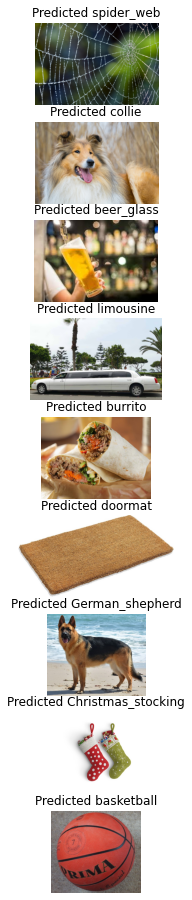

In [ ]:
showImg(model, "EfficientNetB7")